#  Task 1
## Stock Prediction :
Take stock price of any company you
want and predicts its price by using LSTM.




### Data set download link:   https://www.kaggle.com/datasets/muhammadbilalhaneef/-tesla-stock-price-from-2010-to-2023

# Importing Libraries

In [84]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle


# Data File Load

In [85]:
#Loading the required data
df=pd.read_csv('Tesla Stock Price (2010 to 2023).csv')
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, 29/06/2010 to 19/01/2023
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3162 non-null   float64
 1   High       3162 non-null   float64
 2   Low        3162 non-null   float64
 3   Close      3162 non-null   float64
 4   Adj Close  3162 non-null   float64
 5   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.9+ KB


In [53]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,59.090024,60.415403,57.622371,59.039845,59.039845,9.394769e+07
std,95.550672,97.746213,93.067484,95.420232,95.420232,8.175154e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.037333,9.252500,8.828500,9.066833,9.066833,4.243012e+07
50%,16.294334,16.514666,16.016334,16.295666,16.295666,7.609725e+07
75%,24.965833,25.212667,24.438666,24.986833,24.986833,1.179720e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [54]:
# to check the shape
print(df.shape)

(3162, 6)


# Data Visualization

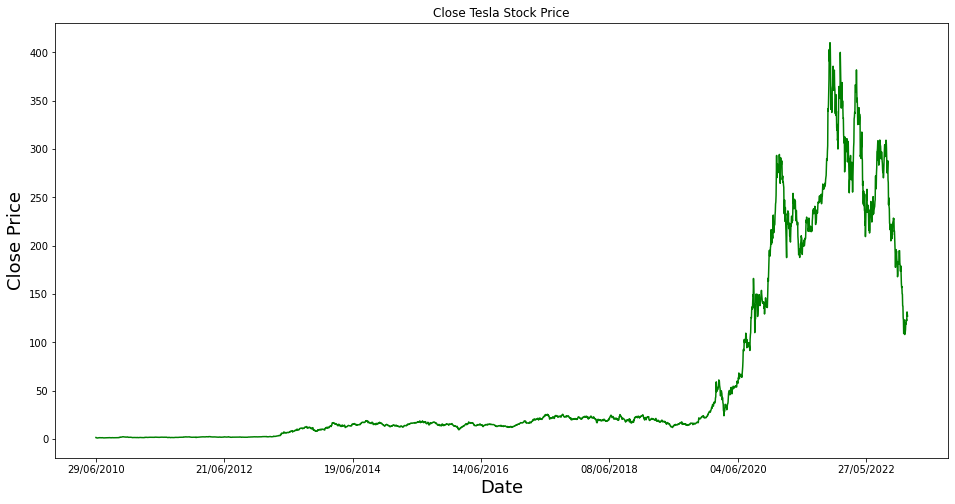

In [55]:

plt.figure(figsize=(30,15))
df["Close"].plot(figsize=(16,8) , color='green')
plt.title("Close Stock Price",fontsize=25)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

<AxesSubplot:>

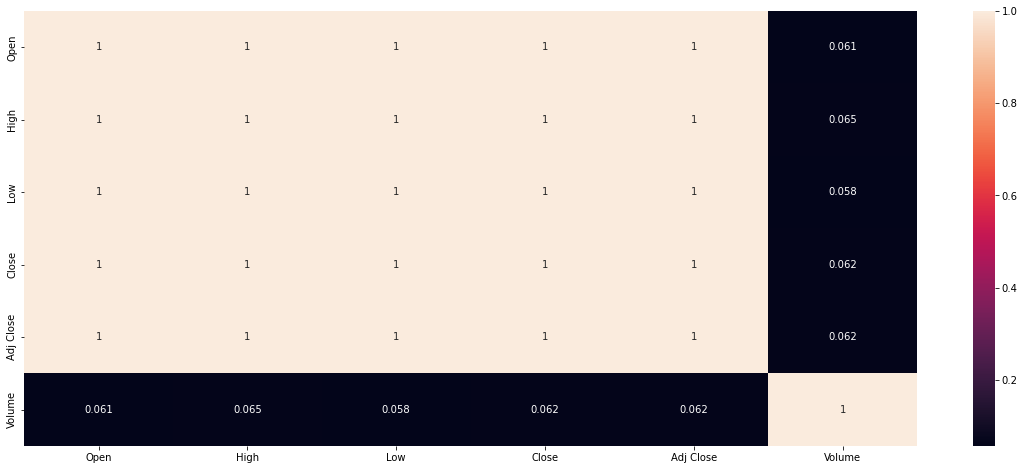

In [56]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(),cbar=True,annot=True)

In [57]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [58]:
dataset = df["Open"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(3162, 1)

# Data Normalization

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Splitting the Data into train and test set

In [60]:
train_size = int(len(data)*.75)
test_size = len(data) - train

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 2371 Test Size :                    Open
Date                   
29/06/2010  3160.733333
30/06/2010  3160.280667
01/07/2010  3160.333333
02/07/2010  3160.466667
06/07/2010  3160.666667
...                 ...
20/11/2019  3138.000000
21/11/2019  3138.365999
22/11/2019  3139.322666
25/11/2019  3139.045334
26/11/2019  3139.648666

[2371 rows x 1 columns]


In [61]:
#shape of train and test data
train_data.shape,test_data.shape

((2371, 1), (851, 1))

In [62]:
# Creating a Training set 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [109]:
x_train.shape, y_train.shape

((2311, 60, 1), (2311,))

# LSTM Model

In [63]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [97]:
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

model =Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))


model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")

In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_12 (LSTM)              (None, 64)                29440     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Fit LSTM to the train set
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='loss', patience=10 , restore_best_weights=True)]

train_history = model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=1)


Epoch 1/100
37/37 [==============================] - 16s 141ms/step - loss: 1.4881e-04 - mean_absolute_error: 0.0087
Epoch 2/100
37/37 [==============================] - 6s 154ms/step - loss: 8.3606e-06 - mean_absolute_error: 0.0022
Epoch 3/100
37/37 [==============================] - 5s 140ms/step - loss: 6.5238e-06 - mean_absolute_error: 0.0019
Epoch 4/100
37/37 [==============================] - 5s 132ms/step - loss: 5.5431e-06 - mean_absolute_error: 0.0017
Epoch 5/100
37/37 [==============================] - 5s 133ms/step - loss: 5.1632e-06 - mean_absolute_error: 0.0016
Epoch 6/100
37/37 [==============================] - 5s 144ms/step - loss: 4.8493e-06 - mean_absolute_error: 0.0016
Epoch 7/100
37/37 [==============================] - 5s 141ms/step - loss: 4.8634e-06 - mean_absolute_error: 0.0016
Epoch 8/100
37/37 [==============================] - 5s 148ms/step - loss: 5.7448e-06 - mean_absolute_error: 0.0018
Epoch 9/100
37/37 [==============================] - 6s 162ms/step - lo

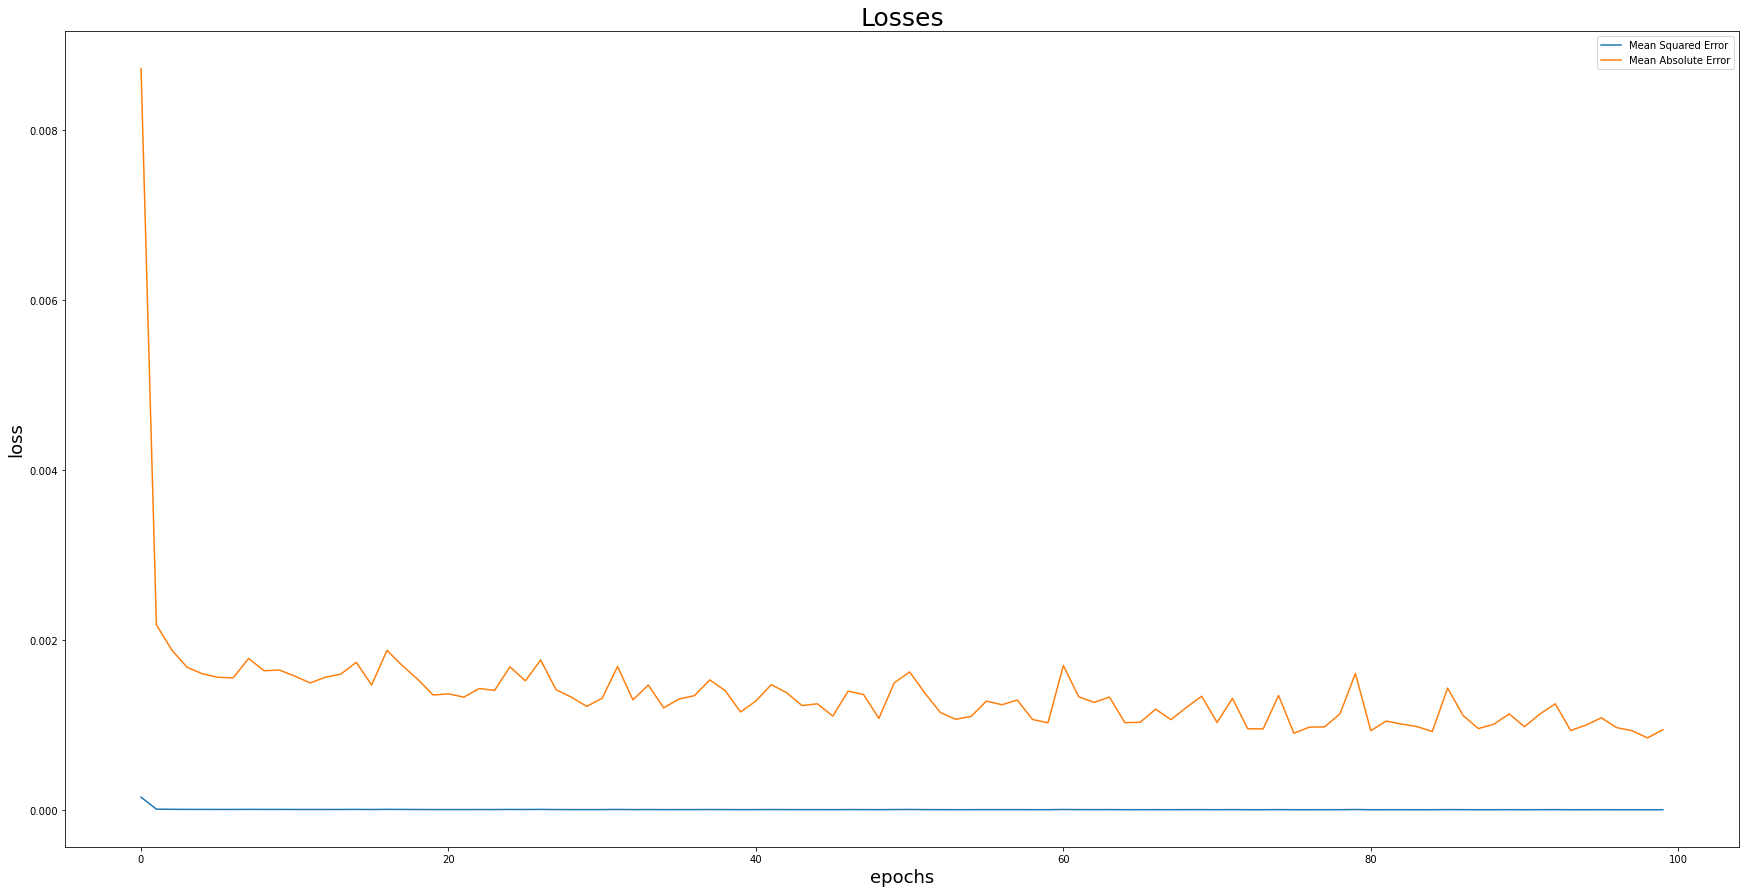

In [105]:
plt.figure(figsize=(30,15))
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses",fontsize = 25)
plt.xlabel("epochs",fontsize = 18)
plt.ylabel("loss",fontsize = 18)
plt.show()

# Creating a testing set

In [106]:

x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [107]:
x_test.shape , y_test.shape

((791, 60, 1), (791,))

In [108]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

25/25 [==============================] - 3s 37ms/step


(791, 1)

# Predicting Test data

In [110]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

8.72

In [111]:
predictions

array([[ 22.928802],
       [ 22.599728],
       [ 22.480732],
       [ 22.425896],
       [ 22.55548 ],
       [ 22.856974],
       [ 22.840435],
       [ 22.844854],
       [ 22.898767],
       [ 23.051636],
       [ 23.587399],
       [ 24.011631],
       [ 24.400373],
       [ 24.60351 ],
       [ 25.263245],
       [ 25.692705],
       [ 26.45863 ],
       [ 27.342108],
       [ 27.794914],
       [ 28.133238],
       [ 28.596272],
       [ 29.078424],
       [ 29.047216],
       [ 28.010363],
       [ 28.08501 ],
       [ 28.969183],
       [ 29.561386],
       [ 30.584509],
       [ 31.590435],
       [ 32.90804 ],
       [ 32.93716 ],
       [ 33.09018 ],
       [ 35.07533 ],
       [ 35.756874],
       [ 34.401985],
       [ 33.87053 ],
       [ 34.648384],
       [ 36.881737],
       [ 37.91411 ],
       [ 38.370113],
       [ 37.317085],
       [ 37.50891 ],
       [ 38.104336],
       [ 40.633606],
       [ 42.45322 ],
       [ 44.38715 ],
       [ 53.169117],
       [ 56.1

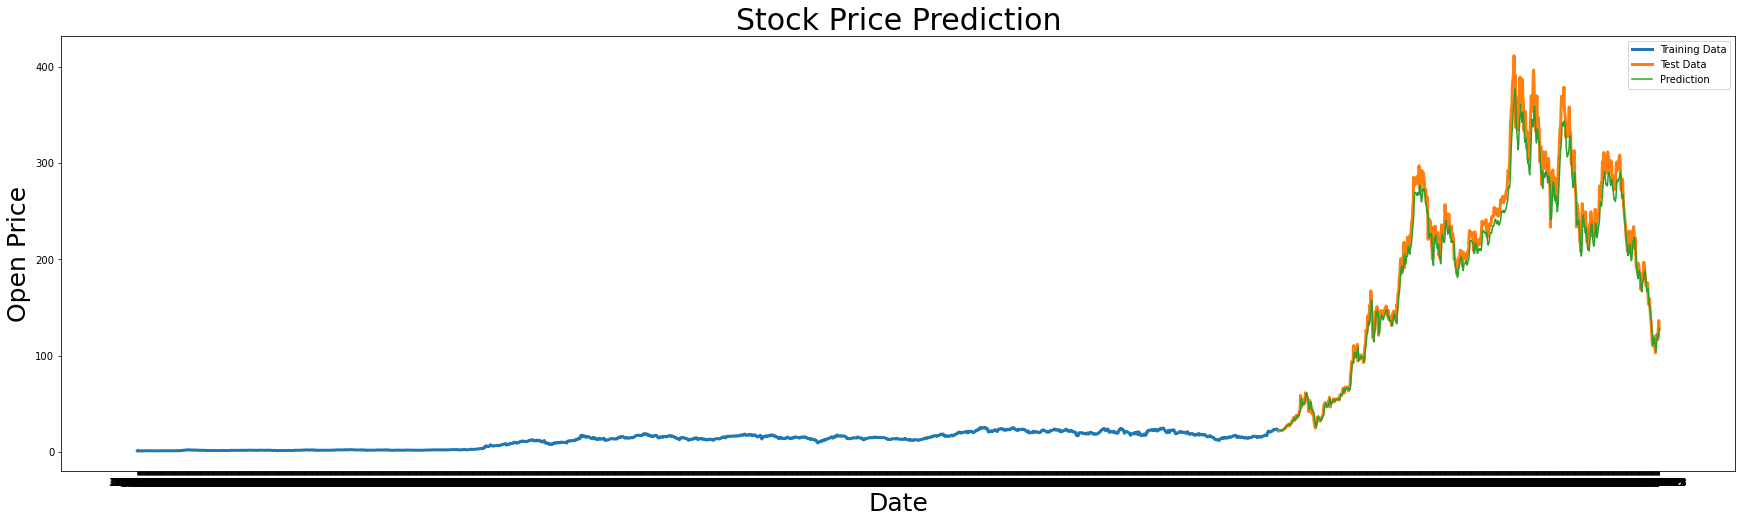

In [127]:

train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(30,8))
plt.title('Stock Price Prediction' , fontsize=30)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Open Price' ,fontsize=25)
plt.plot(train['Open'],label='Training Data',linewidth=3)
plt.plot(test['Open'],label='Test Data',linewidth=3)
plt.plot(test['Predictions'],label='Prediction')
# plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()


# As Dates are coming as not readable format, hence i am taking some Dates

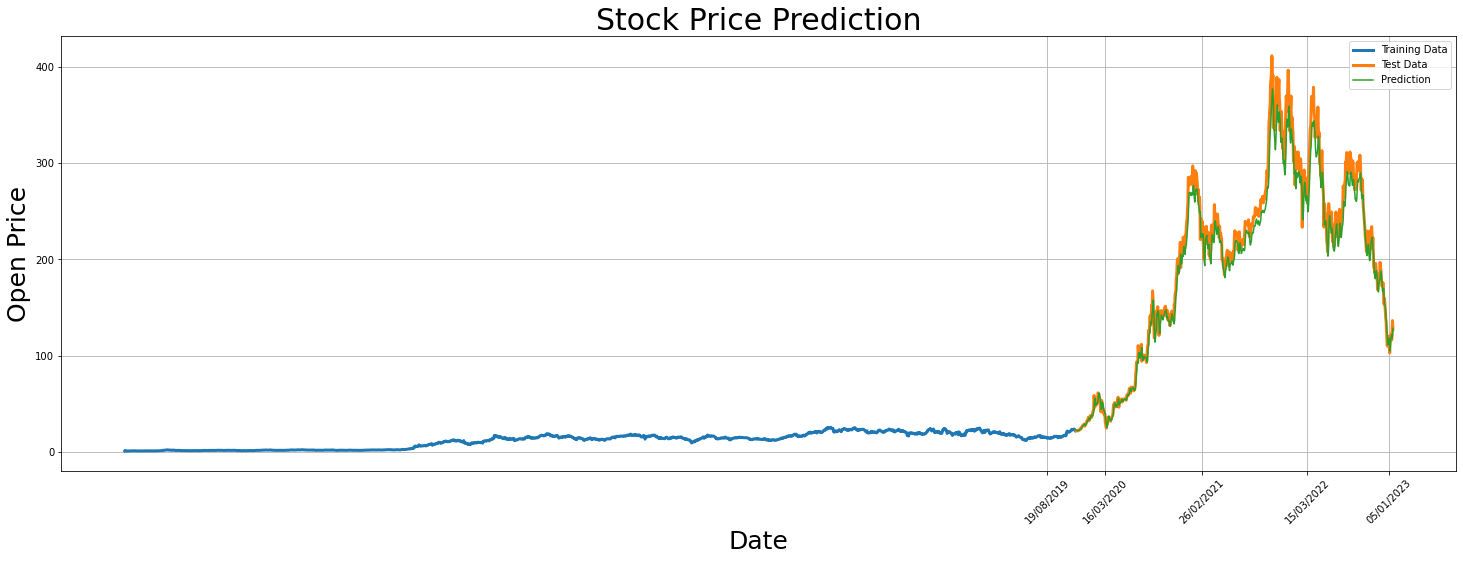

In [125]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(25,8))
plt.title('Stock Price Prediction' , fontsize=30)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Open Price' ,fontsize=25)
plt.plot(train['Open'],label='Training Data',linewidth=3)
plt.plot(test['Open'],label='Test Data',linewidth=3)
plt.plot(test['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
plt.grid(True)
plt.legend()
plt.show()